#  Supervised Classification Objective

**Objective:** Given a sales transaction’s characteristics, predict which payment method is most likely to be used.

- **Target variable:** `PaymentMethod`

## Step 1: Import Libraries

In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Step 2: Connect to SQL Server Data Warehouse

In [2]:
# SQL Server connection settings (using Windows Authentication)
server = 'localhost'  # e.g., 'localhost' or your server name
database = 'DW_Monoprix'  # Change to your target Data Warehouse
driver = '{ODBC Driver 17 for SQL Server}'

# Create connection string and connect
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(connection_string)

## Step 3: Query Data from Table

In [3]:
# Step 3: SQL Query to get relevant data
query = """
SELECT
    F.SalesTransactions_Amount,
    F.Product_Price,
    F.Product_VATRate,
    C.City,
    C.PostalCode,
    S.Country,
    S.City AS Store_City,
    P.Origin,
    CA.BK_Category AS Category,
    ST.PaymentMethod
FROM Fact_SalesPerformance F
LEFT JOIN DimCustomer C ON F.CustomerID = C.PK_Customer
LEFT JOIN DimStore S ON F.StoreID = S.PK_Store
LEFT JOIN DimProduct P ON F.ProductID = P.PK_Product
LEFT JOIN DimCategory CA ON F.CategoryID = CA.PK_Category
LEFT JOIN DimSalesTransactions ST ON F.SalesTransactionsID = ST.PK_SalesTransactions
WHERE F.SalesTransactions_Amount IS NOT NULL
"""

df = pd.read_sql(query, conn)

df


C:\Users\aneek\AppData\Local\Temp\ipykernel_32800\2842642194.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,SalesTransactions_Amount,Product_Price,Product_VATRate,City,PostalCode,Country,Store_City,Origin,Category,PaymentMethod
0,4926.0,3.0,5.5,Ville 674,Pays,Pays,Ville 193,FRANCE,Pâtes,Virement
1,2704.0,3.2,5.5,Ville 674,Pays,Pays,Ville 193,FRANCE,Pâtes,Espèces
2,4926.0,3.0,5.5,Ville 674,Pays,Pays,Ville 193,FRANCE,Pâtes,Virement
3,2704.0,3.2,5.5,Ville 674,Pays,Pays,Ville 193,FRANCE,Pâtes,Espèces
4,3498.0,2.2,5.5,Ville 674,Pays,Pays,Ville 193,FRANCE,Fruits et Légumes,Espèces
...,...,...,...,...,...,...,...,...,...,...
13995,1334.0,2.3,5.5,Ville 674,Pays,Pays,Ville 711,FRANCE,Alimentaire,Espèces
13996,762.0,3.0,5.5,Ville 674,Pays,Pays,Ville 711,FRANCE,Pâtes,Carte
13997,762.0,3.0,5.5,Ville 674,Pays,Pays,Ville 711,FRANCE,Pâtes,Carte
13998,4212.0,3.0,5.5,Ville 674,Pays,Pays,Ville 711,FRANCE,Pâtes,Carte


## Step 4: Preprocess the Data

In [4]:
df_clean = df.dropna()
df_encoded = pd.get_dummies(df_clean, columns=['Country', 'City', 'PostalCode', 'Store_City','Origin','Category' ], drop_first=True)
df_encoded

,SalesTransactions_Amount,Product_Price,Product_VATRate,PaymentMethod,Store_City_Ville 10,Store_City_Ville 100,Store_City_Ville 1000,Store_City_Ville 101,Store_City_Ville 102,Store_City_Ville 103,...,Category_Jouets éducatifs,Category_Livres Jeunesse,Category_Loisirs,Category_Pâtes,Category_Sauces,Category_Sports,Category_Surgelés,Category_Textile,Category_Viande,Category_Épices
0,4926.0,3.0,5.5,Virement,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2704.0,3.2,5.5,Espèces,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,4926.0,3.0,5.5,Virement,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2704.0,3.2,5.5,Espèces,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,3498.0,2.2,5.5,Espèces,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1334.0,2.3,5.5,Espèces,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13996,762.0,3.0,5.5,Carte,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
13997,762.0,3.0,5.5,Carte,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
13998,4212.0,3.0,5.5,Carte,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encodez la colonne PaymentMethod avant le split
le = LabelEncoder()
df_encoded['PaymentMethod'] = le.fit_transform(df_encoded['PaymentMethod'])

In [6]:
#Separate features and target
X = df_encoded.drop(columns=['PaymentMethod'])
y = df_encoded['PaymentMethod']

In [7]:
df_encoded['PaymentMethod'].value_counts()

PaymentMethod
1    4804
0    4634
2    4562
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

standadizer=StandardScaler()
data=standadizer.fit_transform(X)
data

array([[ 1.6865921 , -0.26549058, -0.11788663, ..., -0.04143947,
        -0.12576857, -0.22384149],
       [ 0.11576343, -0.24881962, -0.11788663, ..., -0.04143947,
        -0.12576857, -0.22384149],
       [ 1.6865921 , -0.26549058, -0.11788663, ..., -0.04143947,
        -0.12576857, -0.22384149],
       ...,
       [-1.25712104, -0.26549058, -0.11788663, ..., -0.04143947,
        -0.12576857, -0.22384149],
       [ 1.18183437, -0.26549058, -0.11788663, ..., -0.04143947,
        -0.12576857, -0.22384149],
       [ 1.18183437, -0.26549058, -0.11788663, ..., -0.04143947,
        -0.12576857, -0.22384149]])

In [9]:
from collections import Counter
Counter(X)

Counter({'SalesTransactions_Amount': 1,
         'Product_Price': 1,
         'Product_VATRate': 1,
         'Store_City_Ville 10': 1,
         'Store_City_Ville 100': 1,
         'Store_City_Ville 1000': 1,
         'Store_City_Ville 101': 1,
         'Store_City_Ville 102': 1,
         'Store_City_Ville 103': 1,
         'Store_City_Ville 104': 1,
         'Store_City_Ville 105': 1,
         'Store_City_Ville 106': 1,
         'Store_City_Ville 107': 1,
         'Store_City_Ville 108': 1,
         'Store_City_Ville 109': 1,
         'Store_City_Ville 11': 1,
         'Store_City_Ville 110': 1,
         'Store_City_Ville 111': 1,
         'Store_City_Ville 112': 1,
         'Store_City_Ville 113': 1,
         'Store_City_Ville 114': 1,
         'Store_City_Ville 115': 1,
         'Store_City_Ville 116': 1,
         'Store_City_Ville 117': 1,
         'Store_City_Ville 118': 1,
         'Store_City_Ville 119': 1,
         'Store_City_Ville 12': 1,
         'Store_City_Ville 120': 1,
  

In [10]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#shape of our data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (11200, 1007) (11200,)
Test set: (2800, 1007) (2800,)


## Step 5: Train and Evaluate KNN

In [11]:
# Applying the KNN algorithm une fois l'affiche bleu apparait c que le training is well done
from sklearn.neighbors  import KNeighborsClassifier
k = 4
knn_clf = KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

## Step 6: Train and Evaluate SVM

In [12]:
# Import necessary libraries for SVM
from sklearn.svm import SVC

# Initialize the SVM model (you can choose different kernels like 'linear', 'rbf', etc.)
svm_model = SVC(kernel='rbf')  # rbf kernel is commonly used

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC()

## Step 7: Train and Evaluate XGBoost

In [13]:
# Import necessary libraries for XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


C:\Users\aneek\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:21:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.4278571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.51      0.45       900
           1       0.44      0.53      0.48      1003
           2       0.44      0.23      0.30       897

    accuracy                           0.43      2800
   macro avg       0.43      0.42      0.41      2800
weighted avg       0.43      0.43      0.42      2800


Confusion Matrix:
 [[455 320 125]
 [328 536 139]
 [328 362 207]]


## Step 8: Summary Comparison


Model Accuracy Comparison:

       Model  Accuracy
0        KNN  0.442857
1  SVM (RBF)  0.357500
2    XGBoost  0.427857


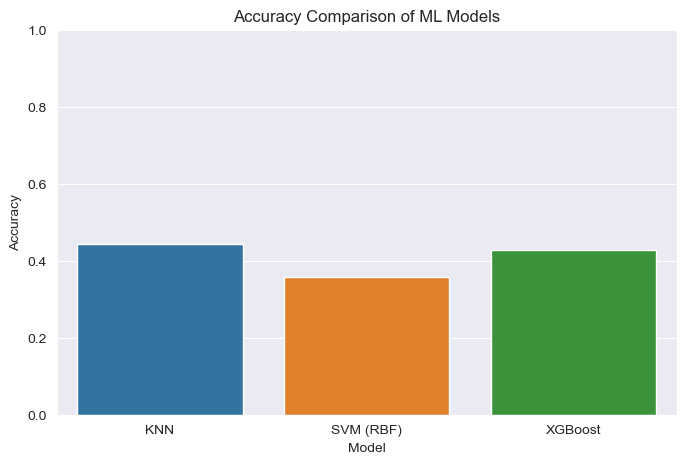

In [14]:
# Compare all models on accuracy
from sklearn.metrics import accuracy_score

# Predict with KNN and SVM
y_pred_knn = knn_clf.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Display results
summary_df = pd.DataFrame({
    'Model': ['KNN', 'SVM (RBF)', 'XGBoost'],
    'Accuracy': [acc_knn, acc_svm, acc_xgb]
})

print("\nModel Accuracy Comparison:\n")
print(summary_df)

# Optional: Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=summary_df)
plt.title('Accuracy Comparison of ML Models')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()
